# 📊 Task 1 – Predictive Analytics Model
### Predicting Customer Response to Marketing Campaigns


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arketing-campaign/marketing_campaign.csv
/kaggle/input/arketing-campaign/marketing_campaign.xlsx


## 📥 Step 1: Load and Preview the Dataset


In [2]:
path = "/kaggle/input/arketing-campaign/marketing_campaign.csv"
data = pd.read_csv(path, sep=';')

df = pd.DataFrame(data)

# Preview the dataset
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## 🧹 Step 2: Data Cleaning and Preparation
- Handle missing values
- Drop irrelevant columns
- Convert date fields
- Encode categorical variables


In [3]:
# حذف عمود ID لأنه غير مؤثر في التنبؤ
df.drop(['ID'], axis=1, inplace=True)

In [4]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [5]:
# معرفة الأعمدة اللي فيها قيم ناقصة
df.isnull().sum()



Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
# مثال: لو في Null في الدخل، نعوض المتوسط
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [7]:
df.dtypes[df.dtypes == 'object']


Education         object
Marital_Status    object
dtype: object

In [8]:
df = df.drop('Dt_Customer', axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])


In [10]:
X = df.drop('Response', axis=1)  # المدخلات (الخصائص)
y = df['Response']               # الهدف (هل العميل استجاب للحملة؟)


## ✂️ Step 3: Split Dataset into Train/Test Sets


In [11]:
from sklearn.model_selection import train_test_split

# تقسيم البيانات بنسبة 80% تدريب و20% اختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🤖 Step 4: Build Logistic Regression Model
- Train the model
- Predict on test data
- Evaluate baseline performance


In [12]:
from sklearn.linear_model import LogisticRegression

# إنشاء النموذج
model = LogisticRegression(max_iter=1000)

# تدريب النموذج على بيانات التدريب
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [13]:
y_pred = model.predict(X_test)


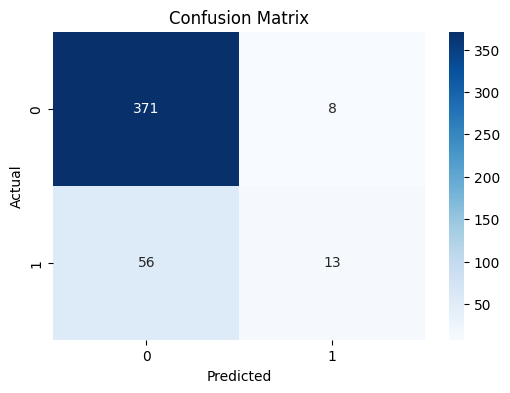

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# إنشاء مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred)

# رسمها
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


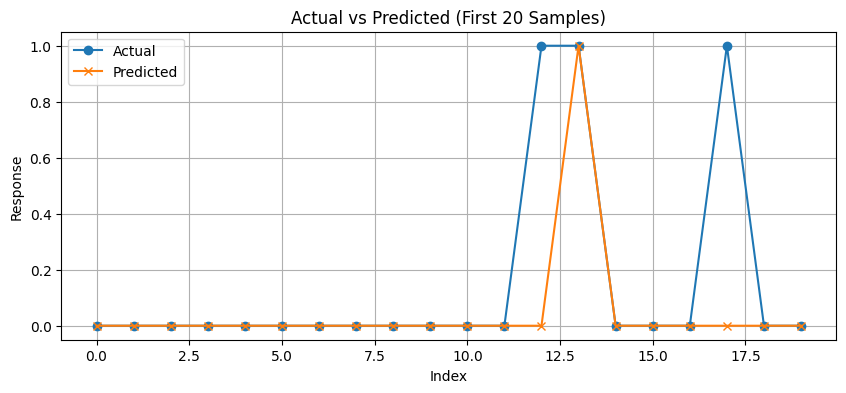

In [15]:
import numpy as np

# رسم شريط بسيط لأوائل التوقعات
plt.figure(figsize=(10, 4))
plt.plot(np.array(y_test[:20]), label='Actual', marker='o')
plt.plot(np.array(y_pred[:20]), label='Predicted', marker='x')
plt.title('Actual vs Predicted (First 20 Samples)')
plt.xlabel('Index')
plt.ylabel('Response')
plt.legend()
plt.grid(True)
plt.show()


## 🌲 Step 5: Build Random Forest Classifier
- Train and evaluate a more powerful model


In [16]:
from sklearn.ensemble import RandomForestClassifier

# إنشاء النموذج
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# تدريب النموذج
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
rf_pred = rf_model.predict(X_test)


## 📈 Step 6: Model Evaluation and Visualization
- Confusion matrix
- Accuracy and classification report
- Compare actual vs predicted responses


In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# دقة النموذج
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

# مصفوفة الالتباس
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

# تقرير مفصل
print("Classification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.8727678571428571
Confusion Matrix:
 [[369  10]
 [ 47  22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       379
           1       0.69      0.32      0.44        69

    accuracy                           0.87       448
   macro avg       0.79      0.65      0.68       448
weighted avg       0.86      0.87      0.85       448



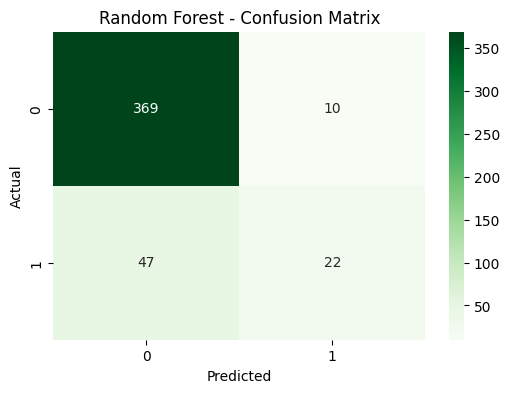

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
